In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sfm
import pandas as pd
from scipy import stats

In [2]:
%config Completer.use_jedi = False

# Корреляция и регрессия

## [3.1 Понятие корреляции](https://stepik.org/lesson/8086/step/1?unit=1365)

Исследуем понятие коорреляции, то есть взаимосвязи между переменными

Введем понятие коэффициента корреляции, который будет показывать количественную оценку взаимосвязи между переменными.

Коэффициент корреляции по сути является косинусом угла между двумя случайными величинами.

Определим ковариацию двух переменных:

$$
cov_{XY} = M \left[ (X-M(X))(Y-M(Y))\right] = M(XY) - M(X)M(Y)
$$

В случае выборки:
$$
cov_{XY} = \frac{\sum_i (X_i - \bar{X})(Y_i - \bar{Y})}{N-1}
$$
Тогда коэффициент корреляции:

$$
r = \frac{cov_{XY}}{\sigma_X\sigma_Y} = \frac{\sum_i (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_i (X_i - \bar{X})^2\sum_i (Y_i - \bar{Y})^2}}
$$

`Задание`

Укажите верные высказывания:

**Ответ**: 
Чем ближе значение коэффициента корреляции к 1 или к -1, тем сильнее взаимосвязь двух переменных.

Коэффициент корреляции может принимать значения на промежутке [-1;1]

Коэффициент детерминации $R^2$ - квадрат коэффициента корреляции. Показывает в какой степени дисперсия одной переменной обусловлена влиянием другой переменной. 
Принимает значения на отрезке $[0, 1]$

`Задание`

Если при исследовании взаимосвязи двух переменных коэффициент детерминации оказался равен 0,25 то

**Ответ**: Коэффициент корреляции равен 0,5 или -0,5

!['alt-text'](./images/37.png)

Соотнесите графики (А, Б, В) и значения коэффициента детерминации 

| Графики | Коэффициент детерминации |
| --- | --- |
| А | 0,02 |
| Б | 0,55 |
| В | 0,9 |




Вернемся к постановке статистических гипотез о равенстве или неравенстве нулю коэффициента корреляции.

In [3]:
sample_1 = np.random.normal(size=100)
sample_2 = np.random.normal(size=100)

Первое число сам коэффициент, второй это pvalue

In [4]:
stats.pearsonr(sample_1, sample_2)

(-0.18058835441310195, 0.07217819544428217)

В данном случае видно, что мы можем принять нулевую гипотезу о равенстве нулю коэффицента корреляции

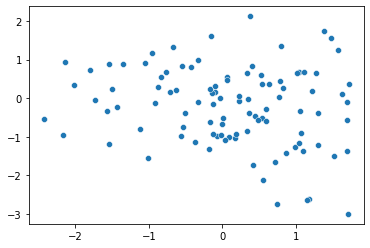

In [5]:
sns.scatterplot(x=sample_1, y=sample_2)
plt.show()

`Задание`
Верно ли это утверждение:  если коэффициент корреляции равен 0,7, то такая взаимосвязь всегда будет статистически достоверна (p - уровень значимости обязательно будет меньше 0,05)
**Ответ**: Нет, высокая корреляция не обязательно означает статистически значимую взаимосвязь.

`Задание`

Чему равен коэффициент корреляции в данной выборке (попробуйте построить график для нахождения верного ответа):

In [6]:
X = np.array([4, 5, 2, 3, 1])
Y = np.array([2, 1, 4, 3, 5])

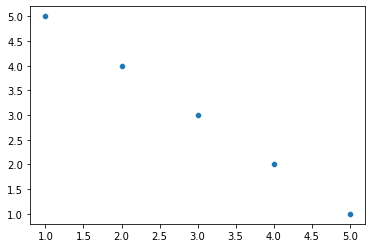

In [7]:
sns.scatterplot(x=X, y=Y)
plt.show()

Графически кажется, что $r_{xy}=-1$

In [8]:
stats.pearsonr(X, Y)

(-1.0, 0.0)

## [3.2 Условия применения коэффициента корреляции](https://stepik.org/lesson/9992/step/1?unit=1923)

Диаграмма рассеявания является хорошим критерием применимости корреляции Пирсона, в случае если видим линейную монотонную связь, то применение оправдано

`Задание`

!["alt-text"](./images/38.png)

Укажите, на каких графиках значение коэффициента корреляции Пирсона приблизительно равняется нулю


**Ответ**: А и В


Желательно, чтобы обе переменные были распределены нормально

Существуют непараметрические коэффициенты корреляции:
1. Коэффициент корреляции Спирмена 
1. Коэффициент корреляции тау Кендалла

Они переходят от реальных значений к ранжированным

Рассмотрим две выборки

In [9]:
X = np.array([3.7, 5.8, 7.1, 9.1, 10.5, 11.4, 11.6, 12.5, 14.3, 17.5, 30.0, 32.0])
Y = np.array([-0.3, 4.1, 4.3, 8.3, 12.9, 8.1, 9.5, 9.5, 18.2, 17.5, 1.0, 2.0])

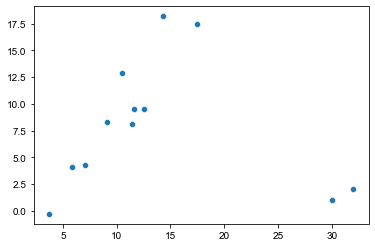

In [10]:
sns.scatterplot(x=X, y=Y)
sns.set_style("darkgrid")
sns.set_palette("bright")
plt.show()

Корреляция есть, но что скажет Пирсон

In [11]:
stats.pearsonr(X, Y)

(-0.1108379778681973, 0.731653469443404)

Пирсон взаимосвязи не видит

Определим коэффициент корреляции Спирмана:
$$
r_s = 1 - \frac{6\sum_i d_i^2}{N(N^2-1)}
$$

In [12]:
def position_in_var_series(arr):
    pos = np.zeros(len(arr), dtype=int)
    for i in range(len(arr)):
        pos[i] = (np.where(np.argsort(arr)==i)[0][0]+1)
    return pos

In [13]:
position_in_var_series(X)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [14]:
position_in_var_series(Y)

array([ 1,  4,  5,  7, 10,  6,  8,  9, 12, 11,  2,  3])

In [15]:
d = (position_in_var_series(X) - position_in_var_series(Y))**2

In [16]:
1 - 6*np.sum(d)/len(X)/(len(X)**2-1)

0.2447552447552448

In [17]:
stats.spearmanr(X, Y)

SpearmanrResult(correlation=0.24168163157672948, pvalue=0.4491887440384277)

`Задание`

Укажите основные требования к данным при использовании коэффициента корреляции Пирсона:

**Ответ**: линейная взаимосвязь двух переменных

`Задание`

Если по результатам исследования мы обнаружили значимую положительную корреляцию уровня преступности и уровня безработицы, то это означает, что:

**Ответ**: Результаты только корреляционного исследования не позволяют нам делать вывод о причинно - следственной связи.

`Задание`

Исследователь решил выяснить, существует ли значимая корреляция между словарным запасом школьников и их физическими особенностями. В исследовании приняло участие 11 классов (с 1 по 11 класс, по 30 человек в каждом классе) некоторой школы. Оказалось, что существует значимая положительная корреляция этих двух показателей (r = 0,7, p < 0,05). Исследователь размышляет, какой вывод он может сделать, основываясь на этих данных:

**Ответ**: Причиной данных результатов, вероятнее всего, является влияние третьей переменной (в каком классе учится школьник), если учесть этот показатель, то значимая взаимосвязь между ростом и словарным запасом не будет обнаружена.

Следует заметить, что корреляция не выявляет причинно-следственных связей.

Также следует заметить, что корреляция может быть связана с третьей переменной. Обе переменные независимы, но каждая из них коррелирует с третьей. Очевидный пример, корреляция: количество пиратов ~ среднегодовая температура.

## [3.3 Регрессия с одной независимой переменной](https://stepik.org/lesson/8087/step/1?unit=1366)

Регрессионый анализ позволяет исследовать взаимосвязь между переменными: а именно одной зависимой переменной, которую обычно обозначают как $Y$ и несколькими независимыми переменными: $X_1,\dots,X_n$. В начале рассмотрим простейший вариант, когда у нас всего одна зависимая переменная


Начнем с линии регрессии.

Введем обозначение для предсказания регрессии:
$$
\hat{y} = \langle w, x \rangle
$$
Несмотря на то, что у нас одна независимая переменная, мы добавим константый признак, для того, чтобы добавить смещение.

Найдем прямую, которая наилучшим образом проходит через наше облако точек. Чтобы определить наилучшую линию будем считать, что мы минимизируем следующий функционал RSS (Residual Sum of Squares), который как бы определяет сумму квадратов остатков:

$$
RSS = \sum_{i} ( \hat{y}  - y)^2
$$


В данном случае решение выражается аналитически:
$$
w = (X^TX)^{-1}X^Ty
$$

Пусть уравнение прямой:
$$
y = b_0 + b_1 \cdot x
$$
Тогда:
$$
b_1 = \frac{sd_y}{sd_x}r_{xy}
$$

$$
b_0 = \bar{Y} - b_1 \bar{X}
$$

In [18]:
data = pd.read_csv('./datasets/states.csv')

In [19]:
# ordinary least squares
model = sfm.ols('female_house~white', data=data).fit()

In [20]:
model.params.white, model.params.Intercept

(-0.127392476407477, 22.043796547518472)

In [21]:
Y = np.asarray(data.female_house)
X = np.asarray(data.white)

In [22]:
b_1 = np.std(Y)/np.std(X)*stats.pearsonr(X, Y)[0]
b_0 = np.mean(Y) - b_1 * np.mean(X)
b_1, b_0

(-0.12739247640747708, 22.043796547518475)

`Задание`

!["Alt-text"](./images/39.png)

Соотнесите графики, на которых изображена регрессионная прямая, и значения коэффициентов в уравнении регрессии: 
$$
\hat{y}=b_{0}+b_{1}*x 
$$

**Ответ**:

| График | Коэффициенты |
| --- | --- |
| А | b1 > 0 ; b0 > 0 |
| Б | b1 > 0 ; b0 < 0 |
| В | b1 < 0 ; b0 > 0 |


`Задание`

Укажите верные высказывания:

**Ответ**:

Мы рассчитываем коэффициенты регрессионной прямой таким образом, чтобы минимизировать сумму квадратов остатков

Если коэффициент корреляции между двумя переменными равен нулю, и обе переменные представлены в z - значениях, то уравнение регрессии примет вид y = 0

`Задание`

!["Alt-text"](./images/40.png)

На графике изображена зависимость двух количественных переменных X и Y. Рассчитайте коэффициент b1 для регрессионной прямой, если коэффициент детерминации равен 0,25:

$$
M_{x} = 15
$$
$$
D_{x} = 25
$$
$$
M_{y} = 10
$$
$$
D_{y} = 36
$$

$$
b_1 = \frac{sd_y}{sd_x}r_{xy} = \sqrt{\frac{D_y}{D_x}R^2}
$$

In [23]:
np.sqrt(36/25*0.25)

0.6

**Ответ**: $r_{xy}=0.6$ 

## [3.4 Гипотеза о значимости взаимосвязи и коэффициент детерминации](https://stepik.org/lesson/8088/step/1?unit=1367)

Поставим гипотезу о наличии взаимосвязи между двумя переменными
Для проверки мы можем воспользоваться t-критерием, определив величину t как:

$$
t = \frac{b_1}{se}
$$
где $se$:
$$
se =\sqrt{\frac{s^2}{\sum_i(x_i-\bar{x})^2}}
$$
где в свою очередь:
$$
s^2 = \frac{1}{N-2}\sum_{i=1}^n (\hat{y}-y)^2
$$

`Задание`

Проверяя нулевую гипотезу об отсутствии взаимосвязи двух наших переменных, мы применяем t - критерий

**Ответ**:

для проверки гипотезы о том, что в генеральной совокупности b1 = 0

`Задание`

Отклонив нулевую гипотезу, о том что $\beta_{1}=0$, мы можем сделать следующий вывод:

**Ответ**:

Обнаружена значимая взаимосвязь двух переменных

Напомним о введеном ранее коэффициенте детерминации: $R^2$, который описывает долю дисперсии зависимой переменной (Y), объясненную регрессионой моделью

$$
R^2 = 1 - \frac{SS_{res}}{SS_{total}}
$$

Напомним, что:
$$
SS_{total} = \sum_i (y_i - \bar{Y})^2
$$
$$
SS_{res} = \sum_i (\hat{y}_i - y_i)^2
$$

In [24]:
data = pd.read_csv('./datasets/states.csv')

# ordinary least squares
model = sfm.ols('female_house~white', data=data).fit()

model.rsquared

0.5645935053867022

In [25]:
Y = np.asarray(data.female_house)
X = np.asarray(data.white)

In [26]:
SST = np.sum((Y-Y.mean())**2)

In [27]:
b_1 = np.std(Y)/np.std(X)*stats.pearsonr(X, Y)[0]
b_0 = np.mean(Y) - b_1 * np.mean(X)

In [28]:
y_pred = b_1*X + b_0

In [29]:
SSR = np.sum((y_pred-Y)**2)

In [30]:
R_squared = 1 - SSR/SST
R_squared

0.5645935053867022

$R^2$ меняется от 0 до 1, что соответствует незначительному объяснению (коэффициент $b_1$ просто равен нулю, то есть независимая переменная не вносит никакого вклада) к значительному (коэффициент $b_1$ равен 1, то есть наша зависимая переменная полностью совпадает с независимой)

`Задание`

Укажите верные высказывания

**Ответ**:

Чем больше коэффициент детерминации, тем большая часть дисперсии зависимой переменной обусловлена взаимосвязью с независимой переменной

Если коэффициент детерминации равен нулю, то и коэффициент b1 (slope) также равен нулю

## [3.5 Условия применения линейной регрессии с одним предиктором](https://stepik.org/lesson/9994/step/1?unit=1924)

Условия применения:

1. Линейная взаимосвязь $X$ и $Y$

1. Нормальное распределение остатков

1. Гомоскедатичность - постоянная изменчивость остатков на всех уровнях независимой переменной

In [31]:
Y = np.asarray(data.female_house)
X = np.asarray(data.white)

Найдем остатки

In [32]:
resid = Y - y_pred

Scatter-plot поможет нам рассмотреть третье требование, дальнейшие два графика покажут, то насколько остатки нормально распределены

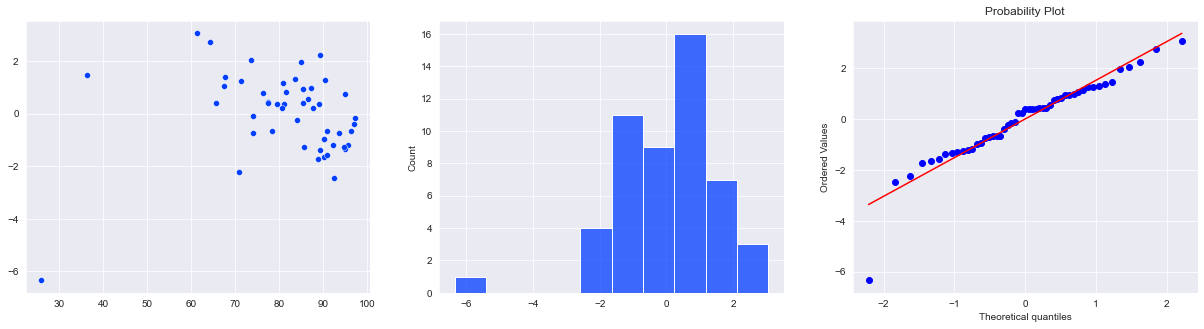

In [33]:
fig = plt.figure(figsize=(21, 5))
ax_1 = fig.add_subplot(131)
ax_2 = fig.add_subplot(132)
ax_3 = fig.add_subplot(133)
sns.set_style("darkgrid")
sns.set_palette("bright")
sns.scatterplot(x=X, y=resid, ax=ax_1)
sns.histplot(x=resid, ax=ax_2)
stats.probplot(resid, plot=ax_3)
plt.show()

`Задание`

В случае линейной взаимосвязи двух переменных распределение остатков

**Ответ**: будет стремиться к нормальному со средним значением, приблизительно равным нулю

`Задание`

Гомоскедастичность  - это 

**Ответ**: одинаковая изменчивость зависимой переменной на всех уровнях независимой переменной (постоянная изменчивость остатков)

`Задание`

!["Alt-text"](./images/41.png)

Исследователь построил несколько регрессионных моделей. На графиках изображено распределение остатков. Как вы считаете, какой график соответствует модели, в которой взаимосвязь двух переменных линейная и выполнено требование гомоскедастичности.

**Ответ**: В

## [3.6 Применение регрессионного анализа и интерпретация результатов](https://stepik.org/lesson/8089/step/1?unit=1368)

Будем анализировать датасет о экономических и социальных показателях разных штатов в США

In [34]:
data = pd.read_csv('datasets/states.csv')

In [35]:
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


| Показатель | объяснение |
| --- | --- |
| metro_res | процент городских жителей |
| white | процент белокожего населения |
| hs_grad | процент людей с высшим образованием |
| poverty | процент бедного населения |
| female_house | процент домохозяйств, управляемых женщиной |

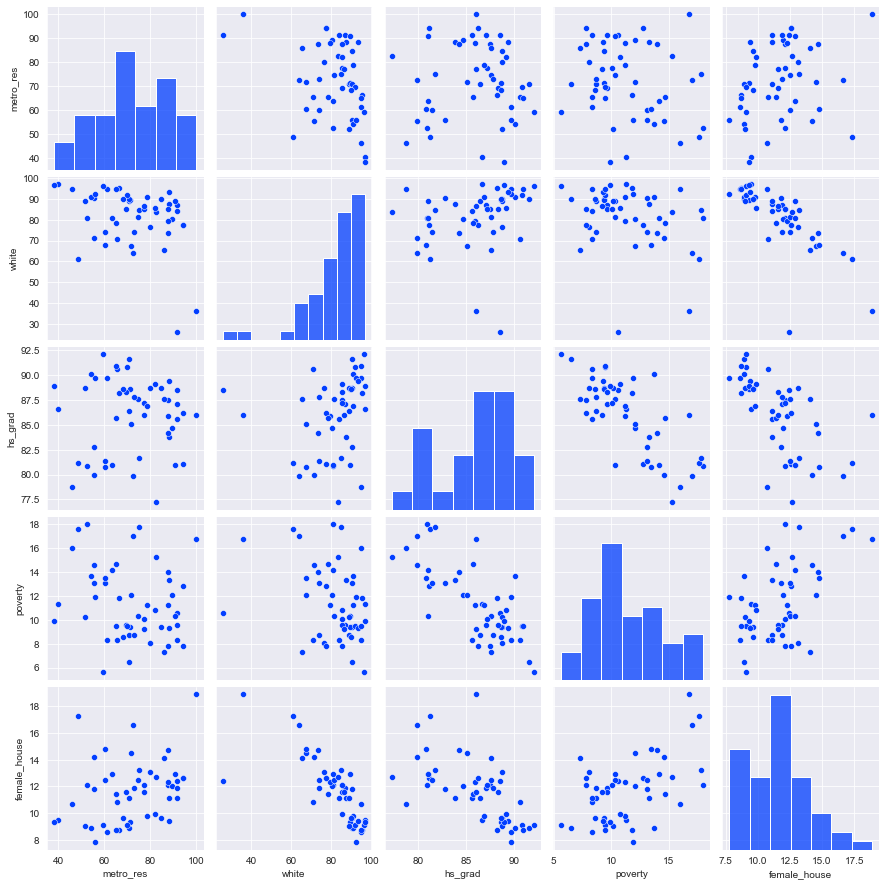

In [36]:
sns.pairplot(data)

Исследуем отдельно бедность и уровень образования

<AxesSubplot:xlabel='hs_grad', ylabel='poverty'>

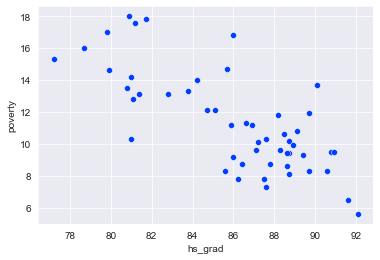

In [37]:
sns.scatterplot(x='hs_grad', y='poverty', data=data)

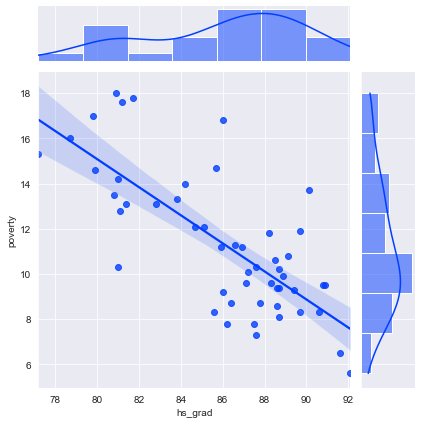

In [38]:
sns.jointplot(x='hs_grad', y='poverty', data=data, kind='reg')

In [39]:
data[['hs_grad', 'poverty']].describe()

,hs_grad,poverty
count,51.000000,51.000000
mean,86.011765,11.349020
std,3.725998,3.099185
min,77.200000,5.600000
25%,83.300000,9.250000
50%,86.900000,10.600000
75%,88.700000,13.400000
max,92.100000,18.000000


In [40]:
model = sfm.ols('poverty~hs_grad', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           3.11e-10
Time:                        20:24:14   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.000      51.111      78.451
hs_grad       -0.6212      0.079     -7.862      0.000      -0.780      -0.462
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.653
Skew:                           0.540   Prob(JB):                        0.265
Kurtosis:                       3.289   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

В таблице представлены все необходимые данные, как видно, мы можем отвергнуть нулевые гипотезы о равенстве нулю коэффициентов модели

`Задание`

Если в нашей модели коэффициент $b_{1}$ оказался не равен нулю,  означает ли это, что обнаружена статистически значимая взаимосвязь ($p<0,05$) между исследуемыми переменными?

**Ответ**: Нет, коэффициент b1, не равный нулю, не всегда означает, что мы отклоняем нулевую гипотезу

Рассотрим теперь остатки 

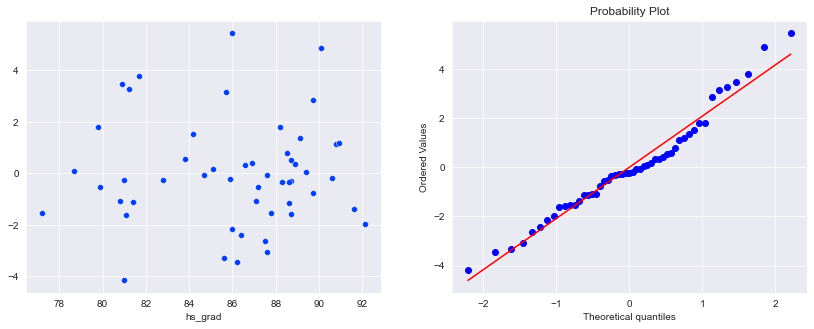

In [41]:
fig = plt.figure(figsize=(14, 5))
ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)
sns.scatterplot(x=data.hs_grad, y=model.resid, ax=ax_1)
stats.probplot(model.resid, plot=ax_2)
plt.show()

`Задание`
!["Alt-text"](./images/42_1.png)
!["Alt-text"](./images/42.png)

На графиках изображено распределение остатков:
Верхний график: распределение остатков на различных уровнях независимой переменной

Нижний график: qq - plot для остатков. 

Основываясь на этих данных, можно заключить, что

**Ответ**: В целом требования гомоскедастичности и нормальности распределения остатков выполнено (хотя и присутствуют заметные положительные отклонения от нуля)

`Задание`

!["Alt-text"](./images/43.png)

В таблице представлены результаты исследования, посвященного взаимосвязи кровяного давления и возраста у людей в возрасте от 45 до 70 лет. Исследователи применили регрессионный анализ, где в качестве зависимой переменной выступало кровяное давление (pressure), а в качестве независимой переменной  - возраст пациентов (age). Согласно полученным результатам, уравнение регрессии будет выглядеть следующим образом:

**Ответ**: Pressure = 58,7 + 1,46*Age

`Задание`

Основываясь на результатах исследования, укажите верные утверждения:

**Ответ**: С каждым единичным положительным изменением независимой переменной (возраста), ожидаемые значения зависимой переменной (давления) увеличиваются на 1,46

Обнаружена статистически значимая положительная взаимосвязь исследуемых переменных


`Задание`
В данном исследовании коэффициент детерминации оказался равен 0,95. Как мы можем проинтерпретировать  этот результат? Укажите все верные высказывания.

**Ответ**: Почти все точки лежат на регрессионной прямой

95 % изменчивости зависимой переменной (давление) объясняется нашей моделью

Коэффициент корреляции между нашими переменными близок к 1

## [3.7 Задача предсказания значений зависимой переменной](https://stepik.org/lesson/9996/step/1?unit=1926)

Регрессия позволяет предсказывать значения зависимой переменной, простым подставлением в уравнение интересующего значения

`Задание`

Если исследователь хочет предсказать значение  уровня бедности, основываясь на значении уровня образованности, то он может больше доверять предсказаниями регрессионной модели, если

**Ответ**: Взаимосвязь переменных линейная и монотонная, распределение остатков стремится к нормальному

`Задание`

Основываясь на нашей регрессионной модели:
$$
\hat{poverty} = 64,78 - 0,62\cdot hs\_grad 
$$                                                              
рассчитайте, какой процент населения, проживающего в бедности, ожидался бы при уровне среднего образования, равного 62% 
В ответ введите само число без знака процента, например: 42,5

In [42]:
64.78 - 0.62 * 62

26.340000000000003

**Ответ**: 26.34

`Задача`

Вообразим мысленный эксперимент! Мы решили исследовать взаимосвязь стоимости (зависимая переменная) и площади квартир (независимая) в городе N. Для этого сформировали выборку из 30 наблюдений и получили, что коэффициент детерминации равен 1 (все наши наблюдения лежат на регрессионной прямой). Означает ли это, что при помощи нашей модели мы можем абсолютно точно предсказывать любые значения стоимости не вошедших в наш анализ квартир, основываясь на их площади? 

**Ответ**: Нет, столь сильная взаимосвязь наших переменных в выборке не означает, что все не включенные в анализ наблюдения также лягут на регрессионную прямую.

## [3.8 Регрессионный анализ с несколькими независимыми переменными](https://stepik.org/lesson/8090/step/1?unit=1369)




Рассмотрим теперь влияние 2 переменных на переменную бедности

In [43]:
data = pd.read_csv('./datasets/states.csv')

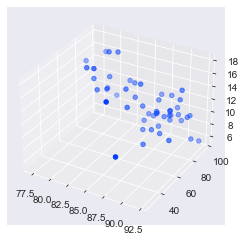

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.hs_grad, data.white, data.poverty)
plt.show()

### Требования к данным

1. Линейная зависимость переменных
1. Нормальное распределение остатков 
1. Гомоскедатичность
1. Проверка на мультиколлинеарность
1. Нормальное распределение переменных (желательно)

Построим регрессионую модель от всех переменных

In [50]:
data.columns

Index(['state', 'metro_res', 'white', 'hs_grad', 'poverty', 'female_house'], dtype='object')

In [53]:
model = sfm.ols('poverty~metro_res+white+hs_grad+female_house', data=data).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           8.88e-10
Time:                        22:28:30   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Интерпретация влияние конкретной переменной осуществляется посредством заморозки других переменных. Так значение -0.06 у metro_res обозначает, что если все остальные переменные оставить постоянными, то при едичином изменении metro_res poverty уменьшится на 0.06.

Это позволяет выявить отсутствие ложных взаимосвязей, так как третья переменная не меняется

При множественной регрессии коэффициент детерминации корректируется

`Задание`
!["Alt-text"](./images/44.png)
Исследователей заинтересовал вопрос, какие факторы взаимосвязаны с показателем кассовых сборов фильма. Для этих целей был применен множественный регрессионный анализ: зависимая переменная - сборы фильма в первый год после выхода на экраны - в миллионах долларов  (receipts)

Независимые переменные, которые были включены в анализ: 

1. бюджет фильма (cost) - в миллионах долларов  

2. средства потраченные на рекламу фильма (promotion) -  в миллионах долларов

3. количество проданных книг, на основе которых был снят фильм (books) -  в миллионах проданных экземпляров

Основываясь на результатах анализа, постройте уравнение регрессии:
$$
\hat{receipts} = b_{0}+b_{1}*cost +b_{2}*promotion + b_{3}*books
$$

**Ответ**: receipts = 7,68 + 3,66*cost + 7,62*promotion + 0,82*books

`Задание`

Основываясь на результатах анализа, укажите верные высказывания:

**Ответ**: Обнаружена статистически значимая положительная взаимосвязь между сборами фильма и количеством средств, потраченных на рекламу.

Не удалось обнаружить значимой взаимосвязи между числом проданных книг и кассовыми сборами фильма.


`Задание`

К вам обратился продюсер, который снимает кино, он наслышан, что при помощи статистики можно получить ответы на все вопросы! Компания уже потратила 10 миллионов на производство фильма (cost), а также было продано 8 миллионов книг (books). Продюсер интересуется, сколько вы посоветуете ему потратить миллионов на рекламу фильма (promotion), если он хочет, чтобы сборы от фильма составили 150 миллионов?

Рассчитайте необходимое количество миллионов на рекламу, основываясь на регрессионном уравнении из прошлого задания. В уравнении регрессии используйте только само число миллионов  в качестве коэффициентов: например, 10 миллионов мы запишем в уравнении просто как 10, а не 10 000 000.

Формат ответа:

например, если ответ равняется 6 миллионов, то просто вводите 6, а не 6 000 000.

In [58]:
np.round((150 - 7.68 - 3.66*10 - 8 * 0.82)/7.62)

13.0

**Ответ**: 13

`Задание`

Коэффициент 3.66  при независимой переменной cost (бюджет фильма) демонстрирует нам:

**Ответ**: Насколько изменяется ожидаемое значение кассовых сборов фильма при единичном изменении независимой переменной cost при условии, что все остальные независимые переменные не изменяются

## [3.9 Выбор наилучшей модели](https://stepik.org/lesson/9995/step/1?unit=1925)

Вспомним о требованиях к модели. Там было требование отсутствие мультиколлинеарности, что означает отсутствие взаимосвязи между независимыми переменными.


Для анализа мультиколлинеарности воспользуемся pairplot

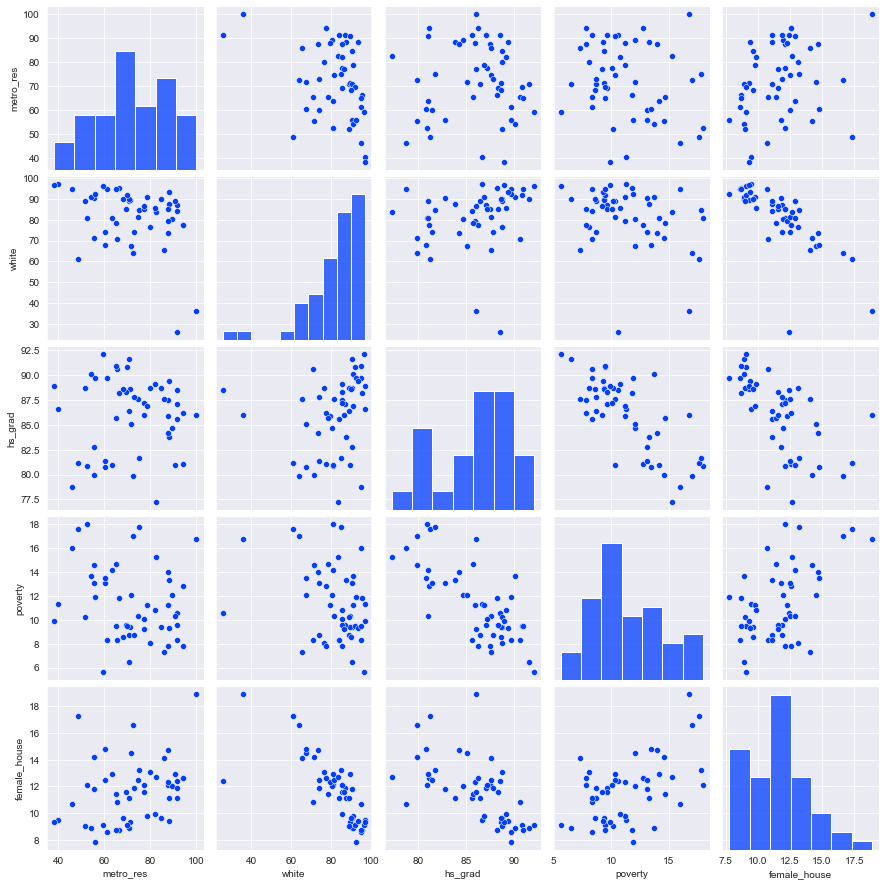

In [59]:
sns.pairplot(data)

In [60]:
data.corr()

,metro_res,white,hs_grad,poverty,female_house
metro_res,1.000000,-0.342442,0.018110,-0.204235,0.300062
white,-0.342442,1.000000,0.238156,-0.308520,-0.751394
hs_grad,0.018110,0.238156,1.000000,-0.746858,-0.611867
poverty,-0.204235,-0.308520,-0.746858,1.000000,0.525397
female_house,0.300062,-0.751394,-0.611867,0.525397,1.000000


Видно, что переменная female_house сильно коррелирует с остальными, поэтому ее наличие в нашей модели регрессии может ухудшить ее качество

В качестве схемы работы можно использовать следующее, построить модель со всем переменными, затем последовательно удалять остальные и отслеживать коэффициент детерминации

In [62]:
model = sfm.ols('poverty~metro_res+white+hs_grad+female_house', data=data).fit()
model.rsquared

0.6415759298804308

Уберем female_house

In [63]:
model = sfm.ols('poverty~metro_res+white+hs_grad', data=data).fit()
model.rsquared

0.6412396705699457

Уберем metro_res

In [64]:
model = sfm.ols('poverty~white+hs_grad+female_house', data=data).fit()
model.rsquared

0.5769045469371752

Уберем white

In [67]:
model = sfm.ols('poverty~metro_res+hs_grad+female_house', data=data).fit()
model.rsquared

0.6250554112179457

Уберем hs_grad

In [68]:
model = sfm.ols('poverty~metro_res+white+female_house', data=data).fit()
model.rsquared

0.42371850997643934

Теперь возьмем лучшую модель, из которой последовательное удаление переменных только ухудшает показатель

In [69]:
final_model = sfm.ols('poverty~metro_res+white+hs_grad', data=data).fit()
final_model.rsquared

0.6412396705699457

И рассмотрим pairplot для данного случая

In [71]:
data[['poverty', 'metro_res','white', 'hs_grad']].corr()

,poverty,metro_res,white,hs_grad
poverty,1.000000,-0.204235,-0.308520,-0.746858
metro_res,-0.204235,1.000000,-0.342442,0.018110
white,-0.308520,-0.342442,1.000000,0.238156
hs_grad,-0.746858,0.018110,0.238156,1.000000


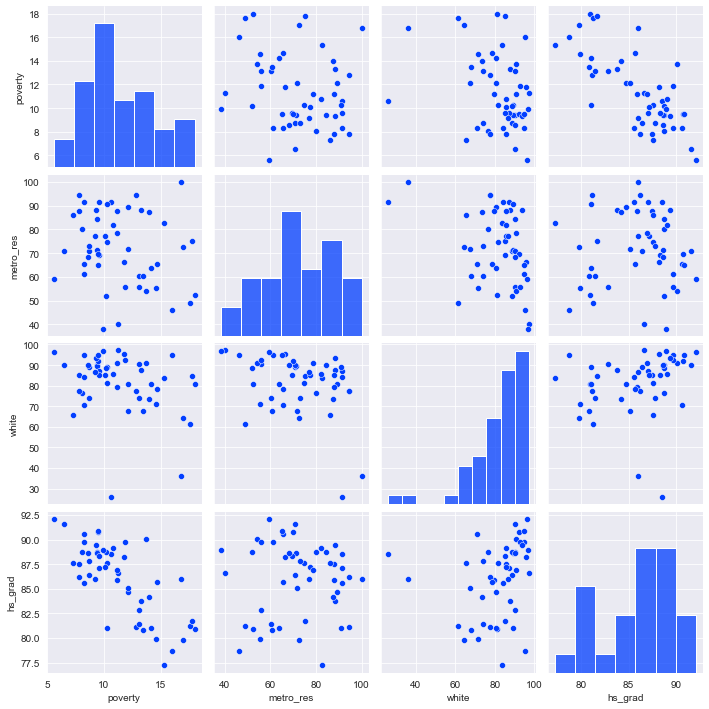

In [70]:
sns.pairplot(data=data[['poverty', 'metro_res','white', 'hs_grad']])

In [72]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           1.55e-10
Time:                        23:46:46   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.000      55.869      81.575
metro_res     -0.0555      0.019     -2.926      0.005      -0.094      -0.017
white         -0.0533      0.021     -2.483      0.017      -0.097      -0.010
hs_grad       -0.5697      0.075     -7.569      0.000      -0.721      -0.418
==============================================================================
Omnibus:                        3.479   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.230
Skew:                           0.607   Prob(JB):                        0.199
Kurtosis:                       2.787   Cond. No.                     3.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Теперь проведем анализ остатков

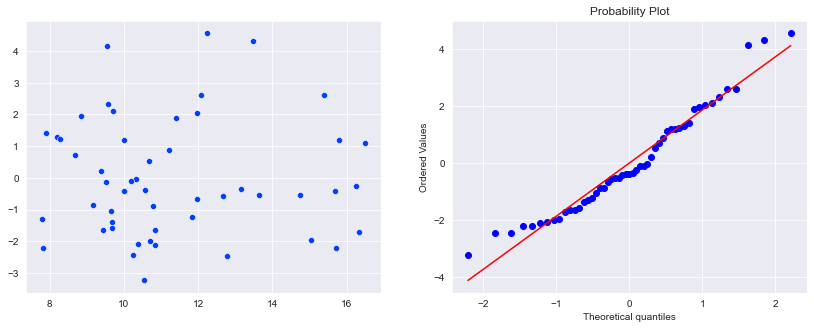

In [74]:
fig = plt.figure(figsize=(14, 5))
ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)
sns.scatterplot(x=final_model.fittedvalues, y=final_model.resid, ax=ax_1)
stats.probplot(final_model.resid, plot=ax_2)
plt.show()

`Задание`

Укажите верные утверждения

**Ответ**: Значение коэффициента b0 (intercept) демонстрирует, чему равняется предсказанное значение зависимой переменной, при условии что все независимые переменные равны нулю

Исправленный коэффициент детерминации рассчитывается при включении в регрессионную модель нескольких независимых переменных

Очень сильная корреляция между независимыми переменными может негативно повлиять на результаты регрессионного анализа

`Задание`

Укажите, какие из предложенных утверждений не являются обязательными условиями для применения множественного регрессионного анализа 
**Ответ**:

Независимые переменные должны сильно коррелировать между собой

Распределение каждой переменной должно значимо отличаться от нормального

`Задание`
!["Alt-text"](./images/45.png)

Основываясь на итоговой регрессионной модели, давайте вновь выполним задачу предсказания. Какой процент людей, проживающих в бедности, ожидается, если :

процент людей со средним образованием (hs_grad) равен 90;                          процент людей, проживающих в столичной области (metro_res), равен 80;                     процент белокожего населения (white) равен 50.

In [76]:
hs_grad = 90
metro_res = 80
white = 50
predict = 68.7 + hs_grad*(-0.57) - metro_res*0.05 - white*0.05
predict

10.900000000000006

**Ответ**: 10.9

`Задание`

!["Alt-text"](./images/46.png)

Сделав прогноз относительно кассовых сборов готовящегося фильма, мы совсем забыли изучить наши данные на предмет мультиколлинеарности.  На графике изображена корреляция между всеми переменными, включенными в анализ. Какие результаты позволяют нам говорить о мультиколлинеарности в наших данных?

**Ответ**: Пара независимых переменных очень сильно коррелирует между собой

## [3.10 Классификация: логистическая регрессия и кластерный анализ](https://stepik.org/lesson/8106/step/1?unit=1372)

### Логистическая регрессия

Логистическая регрессия позволяет нам исследовать между зависимыми переменными, которые имеют всего два значения, и различными предикторами.

In [3]:
admit = np.array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])
mark = np.array([3.61, 3.67, 4.00, 3.19, 2.93, 3.00, 2.98, 3.08, 3.39, 3.92, 4.00, 3.22, 4.00])

In [5]:
data = pd.DataFrame({'admit': admit, 'mark': mark})

[Text(0, 0, 'Не поступил'), Text(1, 0, 'Поступил')]

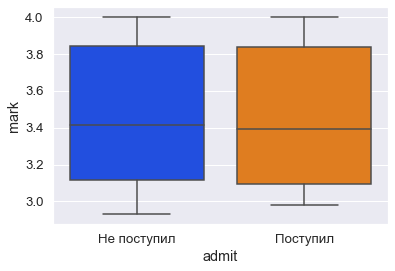

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style("darkgrid")
sns.set_palette("bright")
sns.boxplot(x='admit', y='mark', data=data, ax=ax)
sns.set(font_scale=1.2)
ax.set_xticklabels(['Не поступил', 'Поступил'])

In [35]:
logit = sfm.logit('admit~mark', data=data).fit()

Optimization terminated successfully.
         Current function value: 0.690184
         Iterations 3


In [36]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                   13
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                           -1
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:               2.216e-06
Time:                        02:13:25   Log-Likelihood:                -8.9724
converged:                       True   LL-Null:                       -8.9724
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1243      4.761      0.026      0.979      -9.207       9.455
mark           0.0086      1.366      0.006      0.995      -2.669       2.686
==============================================================================
"""

### Кластерный анализ

Разделяет объекты на группы со схожими свойствами


In [38]:
from scipy.cluster import hierarchy

In [41]:
life_exp = pd.read_csv('./datasets/life_expectancy_2016.csv')
gdp = pd.read_csv('./datasets/gdp_2016.csv')

In [43]:
gdp.columns

Index(['country', 'gdp'], dtype='object')

In [45]:
data = pd.merge(life_exp, gdp, on='country')

In [48]:
data = data.set_index(data.country)

In [49]:
data.columns

Index(['country', 'life_expect', 'gdp'], dtype='object')

<AxesSubplot:xlabel='gdp', ylabel='life_expect'>

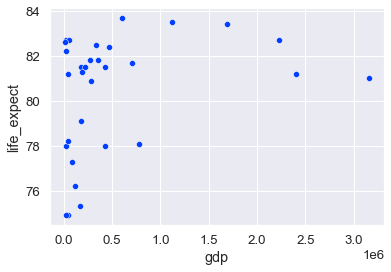

In [53]:
sns.set_style("darkgrid")
sns.set_palette("bright")
sns.scatterplot(x='gdp', y='life_expect', data=data)

In [58]:
Z = hierarchy.linkage(np.asarray(data[['gdp', 'life_expect']]))

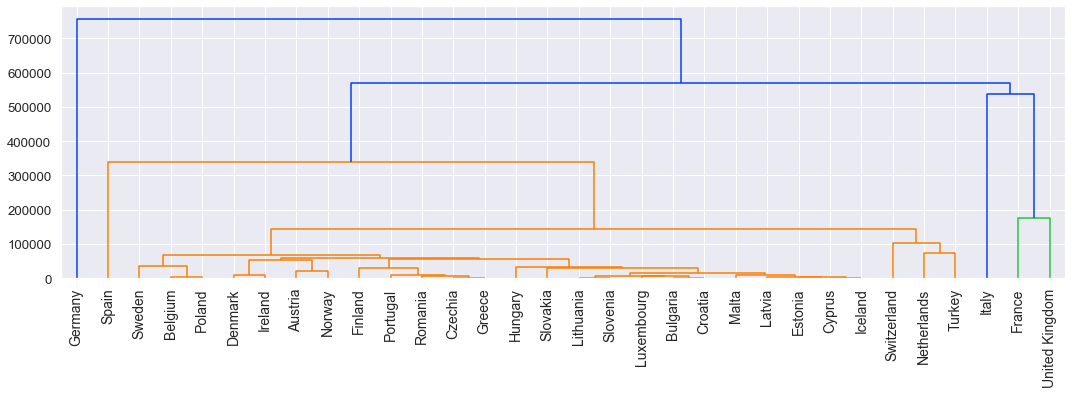

In [66]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(111)
hierarchy.dendrogram(Z, labels=data.index.to_list(),ax=ax)
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14)
plt.show()

Кластерный анализ часто применяется для снижения размерности